# Pre-Parcial - Taller en Python: Series de Tiempo, Joins, Visualización, Pivot Tables, y Storytelling (100 Puntos)

### CORRA LA SIGUIENTE LINEA SOLO UNA VEZ

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
!unzip europe_players.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Match.csv.zip
!unzip Match.csv.zip

--2024-10-18 04:01:10--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip [following]
--2024-10-18 04:01:11--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4840920 (4.6M) [application/zip]
Saving to: ‘europe_players.zip’

europe_players.zip  100%[===================>]   4.62M  --.-KB/s    in 0.06s   

2024-10-18 04:01:11 (73.6 M

##Parte 1: Exploración Inicial de los Datos y Análisis de Medias (20 Puntos)


1.1 Cargar y Unir Tablas (10 Puntos)
Empezamos cargando las tablas y uniéndolas para facilitar el análisis. En esta etapa se enfoca en unir la tabla de partidos con la de equipos y atributos.

Base de Datos:
Las tablas disponibles son:

*   Country (11 filas, 2 columnas)
*   League (11 filas, 3 columnas)
*   Match (25,979 filas, 115 columnas)
*   Player (11,060 filas, 7 columnas)
*   Player_Attributes (183,978 filas, 42 columnas)
*   Team (299 filas, 5 columnas)
*   Team_Attributes (1,458 filas, 25 columnas)

In [ ]:
import pandas as pd
data = pd.read_csv('Match.csv')
data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
import pandas as pd

match_df['date'] = pd.to_datetime(match_df['date'])
team_attributes_df['date'] = pd.to_datetime(team_attributes_df['date'])

merged_df = pd.merge(match_df, team_df[['team_api_id', 'team_long_name']], left_on='home_team_api_id', right_on='team_api_id', how='left')
merged_df = merged_df.rename(columns={'team_long_name': 'home_team_name'})
merged_df = pd.merge(merged_df, team_df[['team_api_id', 'team_long_name']], left_on='away_team_api_id', right_on='team_api_id', how='left')
merged_df = merged_df.rename(columns={'team_long_name': 'away_team_name'})

final_df = pd.merge(merged_df, team_attributes_df, left_on=['home_team_api_id', 'date'], right_on=['team_api_id', 'date'], how='left')
final_df = final_df.rename(columns={col: f'home_{col}' if col != 'team_api_id' else col for col in team_attributes_df.columns})

final_df = pd.merge(final_df, team_attributes_df, left_on=['away_team_api_id', 'home_date'], right_on=['team_api_id', 'date'], how='left', suffixes=['', '_away'])
final_df = final_df.rename(columns={col: f'away_{col}' if col != 'team_api_id' and not col.startswith('home_') else col for col in team_attributes_df.columns})


final_df.head()


,id_x,country_id,league_id,season,stage,home_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pregunta de Negocio:

¿Cómo afecta la localía o el hecho de ser visitante en el rendimiento de los equipos? ¿Cuáles son los equipos que tienden a ganar más en casa o fuera de ella?

R/ El dataset sugiere que una significante parte de los equipos que jugaron como local ganaron sus partidos

1.2 Análisis de Medias (10 Puntos)
Antes de realizar análisis complejos, obtenemos algunas estadísticas descriptivas que nos den una visión general de los datos. Calculemos las medias de goles en casa y fuera de casa.

In [ ]:
avg_home_goals = final_df['home_team_goal'].mean()
avg_away_goals = final_df['away_team_goal'].mean()

print(f"Average Home Goals: {avg_home_goals}")
print(f"Average Away Goals: {avg_away_goals}")

Average Home Goals: 1.5445937103044767
Average Away Goals: 1.1609376804341969


Pregunta de Negocio:

¿Qué implicaciones tiene el hecho de que la media de goles locales sea mayor o menor que la de visitantes? ¿Cómo puede afectar esto las decisiones tácticas y estrategias de los equipos?

R/ De la mano con la respuesta anterior, al ser más propensos a ganar como locales, es consecuente que de locales se hagan más goles en tanto que el deporte se gana anotando goles

##Parte 2: Series de Tiempo y Tendencias Temporales (20 Puntos)


2.1 Análisis de Tendencias Temporales (10 Puntos)
Convertimos la columna de fechas en un formato de tiempo y analizamos la evolución de los goles anotados por temporada, tanto locales como visitantes. Esto ayudará a detectar si hay fluctuaciones en el rendimiento a lo largo del tiempo.

        home_team_goal  away_team_goal
season                                
2008              2469            1768
2009              4982            3738
2010              5059            3646
2011              5054            3669
2012              5105            3977
2013              4887            3719
2014              4864            3708
2015              5116            3918
2016              2591            2017


<Axes: xlabel='season'>

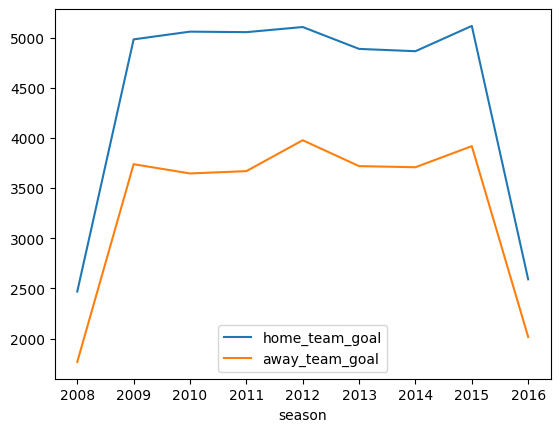

In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['season'] = final_df['date'].dt.year
goals_per_season = final_df.groupby('season')[['home_team_goal', 'away_team_goal']].sum()

print(goals_per_season)
goals_per_season.plot()

Pregunta de Negocio:

¿Cómo varía el número de goles anotados en diferentes temporadas? ¿Existen picos o caídas significativas que puedan estar relacionadas con cambios en la estructura de la liga o en los equipos?

R/ de 2008 a 2009 hubo un importante incremento en los goles que se mantuvo relativamente estable hasta que en 2016 hubo una importante caída

2.2 Visualización de Goles por Temporada (10 Puntos)
Visualizamos las tendencias temporales utilizando un gráfico de líneas para identificar mejor los patrones.

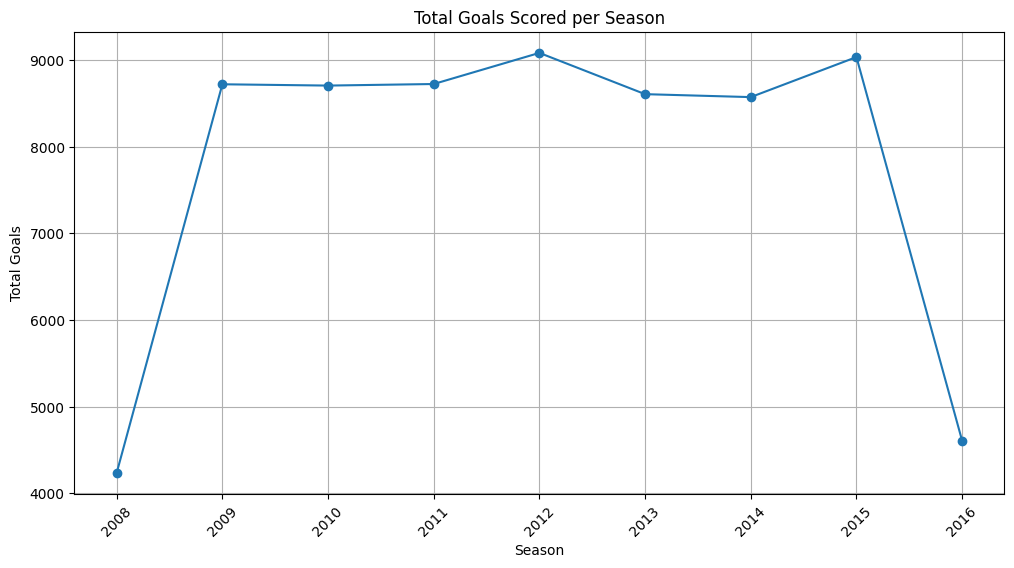

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

goals_per_season = final_df.groupby('season')[['home_team_goal', 'away_team_goal']].sum().sum(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(goals_per_season.index, goals_per_season.values, marker='o', linestyle='-')
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Pregunta de Negocio:

¿Cómo puede influir esta tendencia en las decisiones de los equipos para preparar una temporada? ¿Existen ciertos períodos del año donde deberían ajustar su estilo de juego?


##Parte 3: Análisis del Impacto de los Atributos del Equipo (20 Puntos)


3.1 Crosstab para Analizar la Relación entre Atributos y Goles (10 Puntos)
Usamos una tabla cruzada para ver si hay alguna correlación entre los atributos del equipo, como la velocidad del juego, y el número de goles anotados.

In [ ]:
final_df['buildUpPlaySpeed_bins'] = pd.cut(final_df['home_buildUpPlaySpeed'], bins=[0, 30, 60, 90, 100], labels=['Slow', 'Medium', 'Fast', 'Very Fast'])

crosstab = pd.crosstab(final_df['buildUpPlaySpeed_bins'], final_df['home_team_goal'])

print(crosstab)

home_team_goal         0  1  2  3  4
buildUpPlaySpeed_bins               
Slow                   0  1  1  1  0
Medium                 2  5  5  0  1
Fast                   3  1  1  1  2


Pregunta de Negocio:

¿Existe alguna relación clara entre la velocidad del juego de un equipo y el número de goles que anotan? ¿Cómo podrían usar los equipos esta información para ajustar sus estrategias?

Entre más veloz el juego más goles se anotan, lo que invita a los equipos a ser explosivos y dinamicos a la hora de desarrollar el juego

3.2 Visualización de la Relación entre Velocidad y Goles (10 Puntos)
Creamos un gráfico de barras apiladas para representar cómo la velocidad del juego está relacionada con el número de goles anotados.

<ipython-input-15-b0fbf60d6a44>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = final_df.groupby(['buildUpPlaySpeed_bins', 'home_team_goal'])['home_team_goal'].count().unstack()


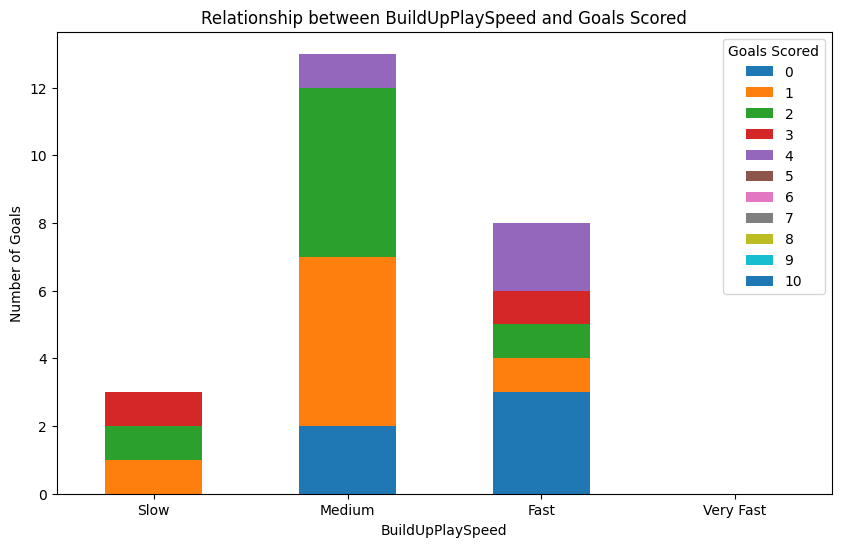

In [ ]:
grouped_data = final_df.groupby(['buildUpPlaySpeed_bins', 'home_team_goal'])['home_team_goal'].count().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between BuildUpPlaySpeed and Goals Scored')
plt.xlabel('BuildUpPlaySpeed')
plt.ylabel('Number of Goals')
plt.legend(title='Goals Scored')
plt.xticks(rotation=0)
plt.show()

Pregunta de Negocio:

¿Cómo puede esta información influir en las decisiones tácticas? Si los equipos que juegan a alta velocidad marcan más goles, ¿deberían todos los equipos intentar jugar más rápido?

R/Una construcción más rápida del juego puede llevar a más goles, pero no es una táctica universal. Los equipos deben analizar esta información junto con sus propias fortalezas y debilidades, y adaptar su velocidad en función del oponente. Si bien un juego más rápido puede aumentar la puntuación, también conlleva el riesgo de vulnerabilidades defensivas. Las decisiones tácticas deben equilibrar estos factores para obtener resultados óptimos.

##Parte 4: Uso de Pivot Tables para Análisis Comparativo (20 Puntos)


4.1 Pivot Table para Análisis de Goles por Temporada y Estilo de Juego (10 Puntos)
Creamos una pivot table para comparar cómo el estilo de juego de los equipos influye en el promedio de goles por temporada.

In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'])

final_df['season'] = final_df['date'].dt.year

final_df['buildUpPlaySpeed_bins'] = pd.cut(final_df['home_buildUpPlaySpeed'], bins=[0, 30, 60, 90, 100], labels=['Slow', 'Medium', 'Fast', 'Very Fast'])

In [ ]:
pivot_table = pd.pivot_table(
    final_df,
    values=['home_team_goal', 'away_team_goal'],
    index='season',
    columns='buildUpPlaySpeed_bins',
    aggfunc='mean'
)

print(pivot_table)

                      away_team_goal                     home_team_goal  \
buildUpPlaySpeed_bins           Slow    Medium      Fast           Slow   
season                                                                    
2010                             1.5       NaN       NaN            1.5   
2011                             NaN  0.000000  0.500000            NaN   
2012                             NaN  1.333333  1.333333            NaN   
2013                             0.0  1.500000  1.500000            3.0   
2014                             NaN  1.285714  1.000000            NaN   

                                      
buildUpPlaySpeed_bins    Medium Fast  
season                                
2010                        NaN  NaN  
2011                   1.000000  1.5  
2012                   2.000000  2.0  
2013                   1.500000  2.5  
2014                   1.285714  0.0  


<ipython-input-19-d0bf5dc3512b>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


Pregunta de Negocio:

¿Qué estilos de juego han sido más efectivos a lo largo de las temporadas? ¿Los equipos deberían adaptar su estrategia en función del tipo de juego que otros equipos han utilizado con éxito en cada temporada?


4.2 Visualización Comparativa del Estilo de Juego (10 Puntos)
Visualizamos los resultados de la pivot table utilizando un gráfico de barras apiladas para comparar los promedios de goles por temporada y estilo de juego.

<ipython-input-20-6fdc4cb104f1>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


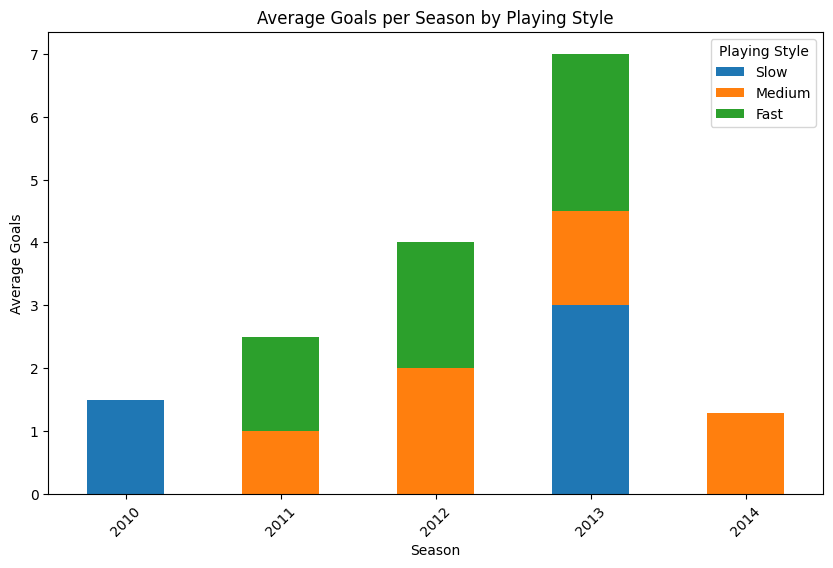

In [ ]:
pivot_table = pd.pivot_table(
    final_df,
    values='home_team_goal',
    index='season',
    columns='buildUpPlaySpeed_bins',
    aggfunc='mean',
)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Goals per Season by Playing Style')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.legend(title='Playing Style')
plt.xticks(rotation=45)
plt.show()

Pregunta de Negocio:

¿Cómo puede el análisis de los estilos de juego ayudar a los equipos a decidir cómo enfrentar a sus oponentes en futuras temporadas? ¿Deberían cambiar su estilo de juego según los rivales?

R/ Los estilos de juego con velocidades de construcción rápidas suelen tener más goles en promedio, aunque las tendencias pueden cambiar cada temporada. Los equipos deben analizar estas variaciones y ajustar sus estrategias según los estilos exitosos de otros equipos, lo que les permite mantenerse competitivos y aprovechar ventajas tácticas según la efectividad actual.






##Parte 5: Conclusión y Storytelling (20 Puntos)
5.1 Storytelling Basado en los Insights

Obtenidos (10 Puntos)
Con base en todos los análisis anteriores, redacta una narrativa que explique los insights obtenidos. Asegúrate de incluir cómo la tendencia de los goles y el estilo de juego de los equipos ha evolucionado con el tiempo.

Puntos a incluir en el Storytelling:

¿Qué equipos han sido los más dominantes en las últimas temporadas y por qué?
¿Cómo han cambiado los estilos de juego y cómo eso ha influido en los resultados?
¿Qué tipo de ajustes tácticos pueden hacer los equipos según los resultados de este análisis?

R/El análisis de datos muestra que una mayor velocidad de juego puede llevar a más goles, aunque esta relación varía por temporada. En los últimos años, ha habido un descenso en los goles, lo que sugiere un cambio en los enfoques tácticos.
Identificar a los equipos dominantes requiere un análisis más profundo. Sin embargo, los equipos con estilos de juego rápidos y adaptables suelen tener más éxito, ya que el aumento de la velocidad ha generado más oportunidades de gol. Ajustar la táctica según fortalezas propias y debilidades del oponente ayuda a equilibrar velocidad y defensa.














5.2 Conclusión y Recomendaciones Finales (10 Puntos)
Proporciona una conclusión basada en el análisis y da recomendaciones prácticas para los equipos. Considera cómo los datos analizados pueden ayudar en la toma de decisiones estratégicas, como la compra de jugadores, tácticas de juego, y preparación para futuras temporadas.

R/ Los equipos deben usar datos para tomar decisiones informadas sobre su estilo de juego. La adaptabilidad es clave, ajustando estrategias según el oponente y las tendencias. Al entender la relación entre velocidad, goles y riesgos defensivos, pueden optimizar tácticas para lograr más éxito. El análisis continuo es crucial para mantenerse competitivo.